#            Simulating Cancer Using Intelligent System (ENGR-541)

## Project: An exploration of Iron's effect on Breast cancer

##### Team: Supriya Bidanta, Hasha Drabek, Ryan Lockard,  Mobarak Alshamsi, Hamad Alkaabi  
      
      

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import odeint

## Calculations and Equations

1. Mean breast volume 454.0cm3

2. Breast tissue 300,000 - 2,000,000 cells/cm3

3. Breast tumor detectable size 10,000,000 cells

 
4. Average amount of cells per cm3 in breast = (2,000,000 - 300,000)/2 = 850,000 cells/cm3
5. Total Cells in Simulation = 850000 * 454 = 385900000 --> round up to 400,000,000
6. Number of tumor cells at beginning = 10,000,000 cells
7. Number of healthy cells = 400,000,000 - 10,000,000 = 390,000,000

$$\frac{dP}{dt}
=
\left(r_{p} + r_{Pfe}\right) \cdot P  \cdot \left(1 - \frac{P + C}{K_{p}} \right) - \left(r_{Pdeath} \cdot P \right)$$

$$\frac{dC}{dt}
=
r_{C} \cdot C \left(1 - \frac{P + C}{K_{p}} \right) - \left(r_{Cdeath} \cdot C \right) - \left(r_{CFpop} \cdot C \right)$$

$$\frac{dF_{l}}{dt}
=
r_{Tr} \cdot iron_{blood} - \left(r_{healthy cell} \cdot C \cdot iron_{local} \right) - \left(r_{cancer cell} \cdot  P  \cdot Iron_{local} \right)$$

$$\frac{dF_{b}}{dt}
=
r_{Ab} \cdot sin \frac{t}{2 \cdot \pi \cdot time} \cdot iron_{day} - \left(r_{use} \cdot iron_{blood} \right) + \left(r_{Ab} \cdot iron_{day} \right) - \left(r_{Tr} \cdot iron_{blood} \right)$$

### Constants

In [ ]:
C = 390000000 
P = 10000000
iron_blood = 800
iron_local = 10

time_period = 28 #period for periodic absorption term


## Working Model

In [ ]:
def breast_model_final(Y,t, rP, rPfe, rPdeath, K, rC, rCFpop, rCdeath, rTr, rAb, rUse, P_rate_iron_use, C_rate_iron_use, iron_per_day):
    
    P = Y[0];
    C = Y[1];
    iron_local = Y[2];
    iron_blood = Y[3];
    
    if(iron_local > 13):
        iron_local = 13
        
    rho_blood = iron_blood  * .01
    rho_local = iron_local    
    
  
    dYdt = [0,0,0,0];
    
    dYdt[0] = (rP + rPfe)*P*(1-(P+C)/K) - (rPdeath * P)
    dYdt[1] = rC * C *(1-(P+C)/K) - (rCdeath * C) - (rCFpop * C)
         
    try:
        dYdt[2] = rTr * iron_blood - (C_rate_iron_use * C * iron_local) - (P_rate_iron_use * P * iron_local)
    except dYdt[2] < -3:
        dYdt[2] = rTr * iron_blood - (C_rate_iron_use * C * iron_local)
    except dYdt[2] < -3:
        dYdt[2] = rTr * iron_blood        
        
    dYdt[3] = -rTr* iron_blood \
              + rAb*(np.sin(t/(2 * np.pi * time_period))) * iron_per_day \
              - rUse * iron_blood \
              + rAb* iron_per_day
       
        
    return dYdt



In [ ]:
def fetch_param_value(model):
    
    iron_per_day = 320
    
    if model == 'Primary':
        rP = 0.01 #growth rate of tumor (from class)
        rPfe = 0 #growth rate ("much, much faster in presence of iron")
        rPdeath =0.01
        K = 500000000
        rC = 0.01 #growth rate of healthy cells (from class)


        rCFpop = 0 #ferropoptosis death rate of healthy cells
        rCdeath = .02 #regular death rate of healthy cells (find from class)
        rTr = .0006 #transfer rate of iron from blood into local breast
        rAb = .06 #body absorption rate of iron
        rUse = .06 #global use rate of iron
        P_rate_iron_use = 0.1
        C_rate_iron_use = 0.05
        
    elif model == 'PreMenopause':
        
        rP = 0.002 #growth rate of tumor (from class)
        rPfe = 0.002 #growth rate ("much, much faster in presence of iron")
        rPdeath =0.001
        K = 500000000 #carrying capacity of one breast
        rC = 0.002 #growth rate of healthy cells (from class)

        rCFpop = 0.0002 #ferropoptosis death rate of healthy cells
        rCdeath = .002 #regular death rate of healthy cells (find from class)
        rTr = .0006 #transfer rate of iron from blood into local breast
        rAb = .0006 #body absorption rate of iron
        rUse = .01 #global use rate of iron
        P_rate_iron_use = 0.00000001
        C_rate_iron_use = 0.000000005 
        #iron_per_day+=150
        
    elif model == 'Menopause':
        
        rP = 0.002 #growth rate of tumor (from class)
        rPfe = 0.002 #growth rate ("much, much faster in presence of iron")
        rPdeath =0.001
        K = 450000000 #carrying capacity of one breast
        rC = 0.0002 #growth rate of healthy cells (from class)

        rCFpop = 0.0001 #ferropoptosis death rate of healthy cells
        rCdeath = 0.0001 #regular death rate of healthy cells (find from class)
        rTr = .0006 #transfer rate of iron from blood into local breast
        rAb = .006 #body absorption rate of iron
        rUse = .06 #global use rate of iron
        P_rate_iron_use = 0.00000001
        C_rate_iron_use = 0.000000005 
        iron_per_day+=150
        
    else:   
        # Final
        rP = 0.002 #growth rate of tumor (from class)
        rPfe = 0.002 #growth rate ("much, much faster in presence of iron")
        rPdeath =0.001
        K = 500000000 #carrying capacity of one breast
        rC = 0.002 #growth rate of healthy cells (from class)

        rCFpop = 0.0002 #ferropoptosis death rate of healthy cells
        rCdeath = .002 #regular death rate of healthy cells (find from class)
        rTr = .006 #transfer rate of iron from blood into local breast
        rAb = .06 #body absorption rate of iron
        rUse = .01 #global use rate of iron
        P_rate_iron_use = 0.00000001
        C_rate_iron_use = 0.000000005   
    
    
    return (rP, rPfe, rPdeath, K, rC, \
            rCFpop, rCdeath, rTr, rAb, rUse, P_rate_iron_use, C_rate_iron_use, iron_per_day) 


In [ ]:
dt = 0.01; 
T = np.arange( 0.0 , 365 * 10 + 0.1*dt , dt );

def design_model(model, y0):
    
      
    rP, rPfe, rPdeath,K, rC ,rCFpop, rCdeath, rTr, rAb, rUse, \
    P_rate_iron_use, C_rate_iron_use, iron_per_day = fetch_param_value(model)
    
    
    params = (rP, rPfe, rPdeath,K, rC ,rCFpop, rCdeath, rTr, rAb, rUse, \
            P_rate_iron_use, C_rate_iron_use, iron_per_day)

    Y = odeint(breast_model_final,y0,T,args=params)
    
    return Y

In [ ]:
def plot_Plot(model_name, y0):
    
    data = design_model(model_name, y0)
    
    tumor_cell = data[:,0]
    healthy_cell = data[:,1]
    iron_local = data[:,2]
    iron_blood = data[:,3]
        
    
    plt.figure(1); 
    plt.clf()
    plt.gcf().set_size_inches(5,5)
    plt.plot( T/365, iron_local, 'c' , T/365 , iron_blood ,'r' ) 
    plt.legend(['L','B'])
    plt.xlabel('Time (years)')
    plt.ylabel('Iron (micromole)')
    plt.title('Breast_Cancer_Model_'+ model_name)

    plt.show()

    plt.figure(1); 
    plt.clf()
    plt.gcf().set_size_inches(5,5)
    plt.semilogy( T/365, iron_local , 'c', T/365 , iron_blood, 'r') 
    plt.legend(['L','B'])
    plt.xlabel('Time (years)')
    plt.ylabel('Iron (micromole)')
    plt.grid(True,which="both", linestyle='-')
    plt.title('Breast_Cancer_Model_'+ model_name + '_log')    
    
    plt.show()


    plt.figure(1); 
    plt.clf()
    plt.gcf().set_size_inches(7,5)
    plt.plot( T/365 , tumor_cell , 'm',  T/365 , healthy_cell, 'g' ) 
    plt.legend(['P','C'])
    plt.xlabel('Time (years)')
    plt.ylabel('Cell Population')
    plt.grid(True,which="both", linestyle='-')
    plt.title('Breast_Cancer_Model_'+ model_name + '_Population')    
    
    plt.show()
    

In [ ]:
y0 = [P, C, 10, 800];

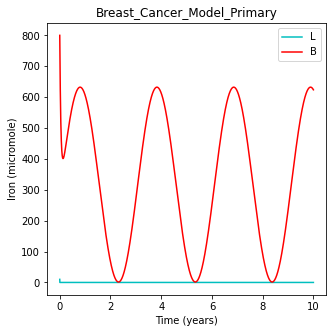

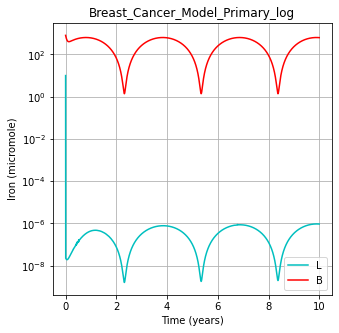

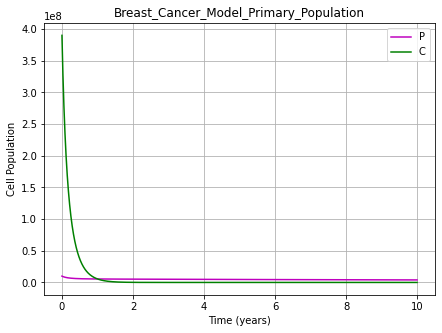

In [ ]:
plot_Plot('Primary', y0)

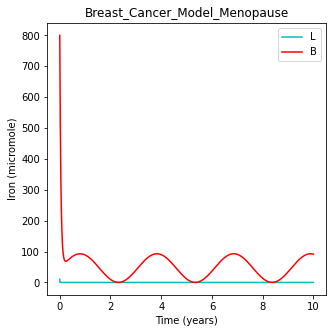

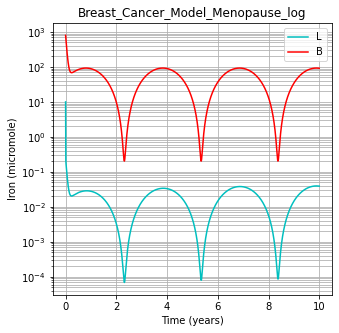

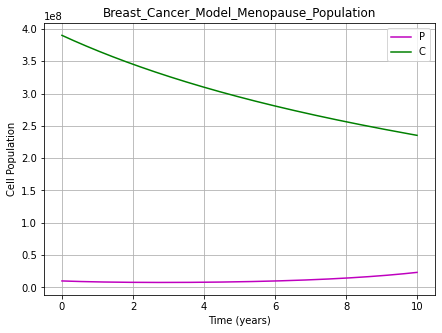

In [ ]:
plot_Plot('Menopause', y0)

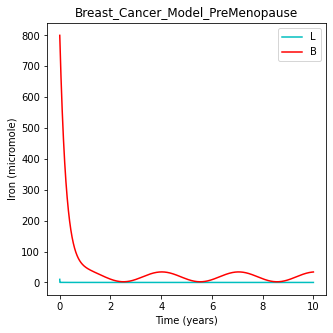

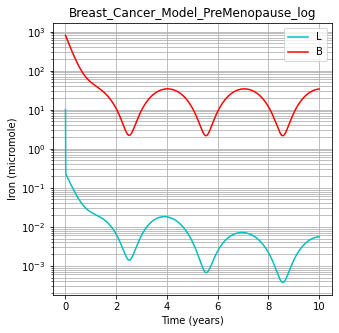

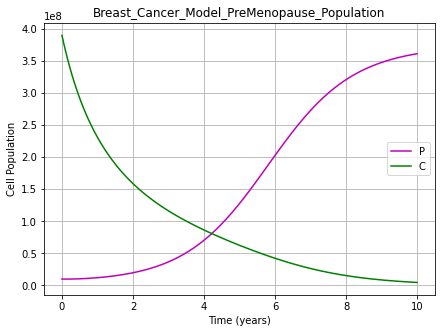

In [ ]:
plot_Plot('PreMenopause', y0)

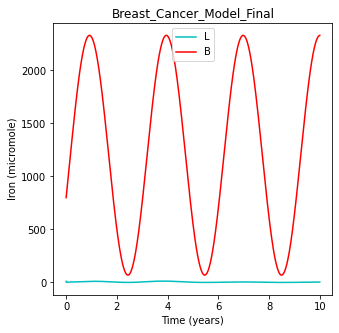

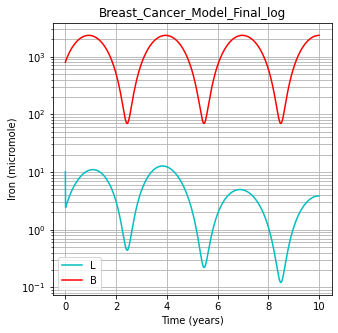

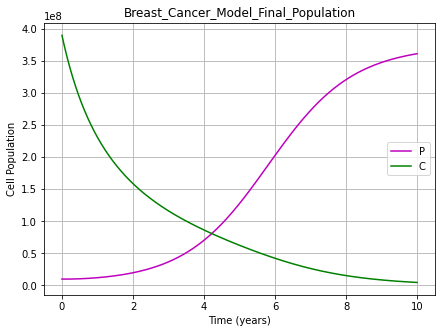

In [ ]:
plot_Plot('Final', y0)

In [ ]:
P = 1250000
y0 = [P, C, 10, 800];

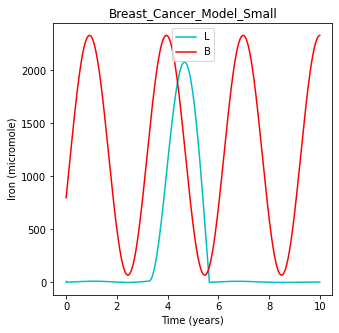

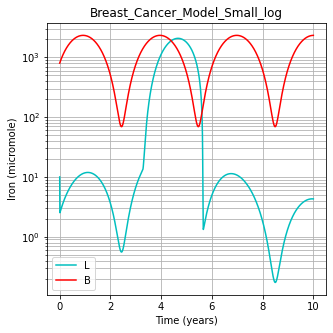

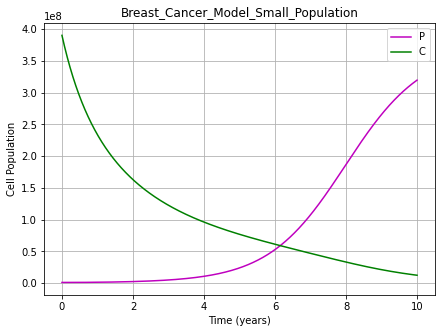

In [ ]:
plot_Plot('Small', y0)

'''
def primary_breast_model(Y,t, rP, rPfe, rPdeath, K, rC, rCFpop, rCdeath, rTr, rAb, rUse, P_rate_iron_use, C_rate_iron_use, iron_per_day):
    P = Y[0];
    C = Y[1];
    iron_local = Y[2];
    iron_blood = Y[3];
    
    if(iron_local > 13):
        iron_local=13
        
    rho_blood = iron_blood  * .01
    rho_local = iron_local
    
  
    #if(iron_local > 12):
        #rCFpop = 0.1
        #rPfe = 0.05      
    
  
    dYdt = [0,0,0,0];
    dYdt[0] = (rP + rPfe)*P*(1-(P+C)/K) - (rPdeath * P)
    dYdt[1] = rC * C *(1-(P+C)/K) - (rCdeath * C) - (rCFpop * C)
    #dYdt[2] = rTr * iron_blood - (C_rate_iron_use * C * iron_local) - (P_rate_iron_use * P * iron_local)
    
    #print(dYdt[2])
    
    #if dYdt[2] < -3:
        #dYdt[2] = -3
        
    try:
        dYdt[2] = rTr * iron_blood - (C_rate_iron_use * C * iron_local) - (P_rate_iron_use * P * iron_local)
    except dYdt[2] < -3:
        dYdt[2] = rTr * iron_blood - (C_rate_iron_use * C * iron_local)
    except dYdt[2] < -3:
        dYdt[2] = rTr * iron_blood
        
        
    #print(dYdt[2])
    #dYdt[2] = rTr * iron_blood - (P_rate_iron_use * P * iron_local) - (C_rate_iron_use * C * iron_local)
    #rho_blood - rho_local)/rho_blood
    dYdt[3] = -rTr* iron_blood + rAb*(np.sin(t/(2 * np.pi * time_period))) * iron_per_day - rUse * iron_blood + rAb* iron_per_day
       
        
    return dYdt
'''

